Chronic Health Insights: Data-driven analysis of US chronic liver disease mortality due to alcohol consumption(2010-2020)

This analytical project presents a comprehensive examination of chronic liver disease mortality and its trends from 2010 to 2020, offering valuable insights for healthcare professionals, policymakers, and researchers. Through data analysis, time series examination, Poisson regression, and data visualization, we uncover evolving trends in chronic liver disease prevalence, mortality rates, and their influencing factors.

The raw dataset used for the analysis is available on the website below. U.S. Department of Health and Human Services, Centers for Disease Control and Prevention. (2020). U.S. Chronic Disease Indicators (CDI). Data.gov. https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi

The raw dataset contains 35 fields and 1048576 observations. The dataset is cleaned and modified conveniently to extract data regarding 'chronic liver disease mortality due to alcohol' consumption using Excel. The cleaned dataset is used for further analysis using python.



Setup

Importing the necessary libraries I will use for this project.

In [16]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading in the file.

In [9]:
df=pd.read_excel(r'C:\divya\588\cleancrude.xlsx')

In [3]:
print(df)

       Year        Location                   Topic  \
0      2018        Colorado                 Alcohol   
1      2019        Colorado                 Alcohol   
2      2011            Iowa                 Alcohol   
3      2018        Oklahoma                 Alcohol   
4      2015  South Carolina                 Alcohol   
...     ...             ...                     ...   
19619  2019        Missouri  Overarching Conditions   
19620  2019         Indiana  Overarching Conditions   
19621  2018        Virginia  Overarching Conditions   
19622  2017        Illinois  Overarching Conditions   
19623  2016   New Hampshire  Overarching Conditions   

                                                Question  CrudeRate  \
0                        Chronic liver disease mortality       14.6   
1                        Chronic liver disease mortality       21.5   
2                        Chronic liver disease mortality       10.8   
3                        Chronic liver disease mortalit

Time series analysis of chronic liver disease mortality. (by computing the overall crude rate of each location)

In [4]:
df1=pd.read_excel(r'C:\divya\588\alcoholtotalcruderate_year.xlsx')

In [5]:
print(df1)

    Year  CrudeRate
0   2010      517.4
1   2011      554.9
2   2012      567.9
3   2013      587.5
4   2014      607.5
5   2015      652.1
6   2016      646.9
7   2017      668.7
8   2018      691.8
9   2019      712.1
10  2020      851.0


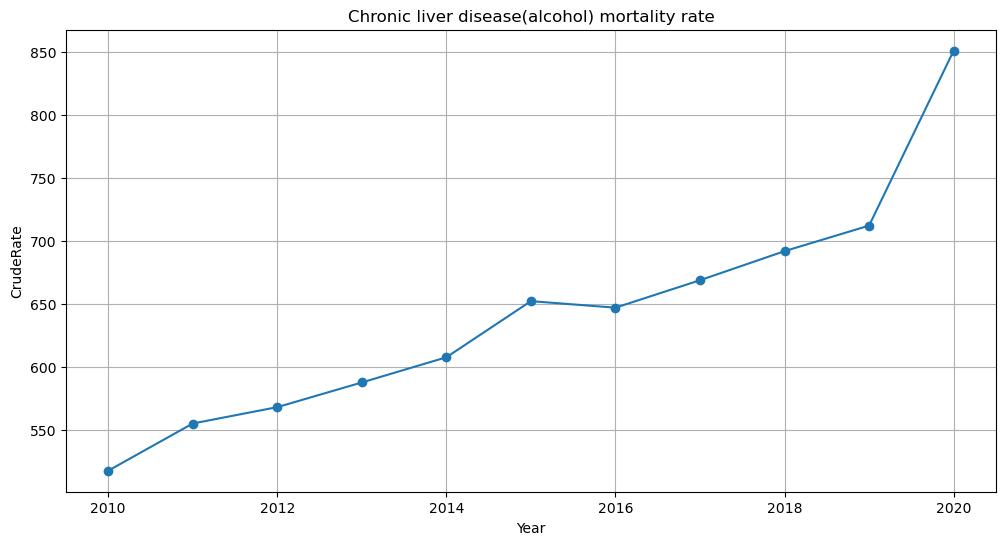

In [6]:
#time series plot
plt.figure(figsize=(12, 6))
plt.plot(df1['Year'], df1['CrudeRate'], marker='o')
plt.xlabel('Year')
plt.ylabel('CrudeRate')
plt.title('Chronic liver disease(alcohol) mortality rate')
plt.grid(True)
plt.show()

•	Time series plot illustrates that there is a clear upward trend in chronic liver disease mortality rates over the decade.       This suggests that the problem is worsening, and the rates are increasing over time.

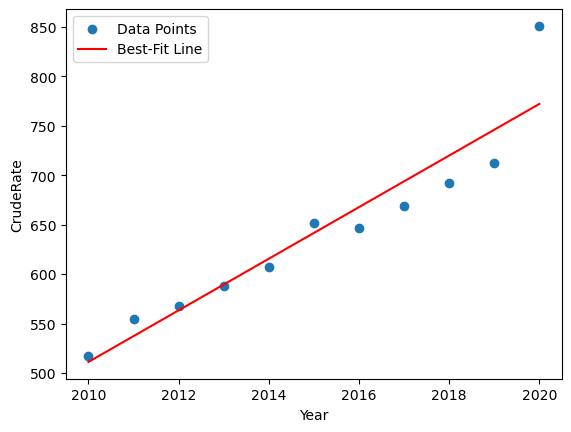

Best-Fit Line Equation: y = 26.09x + -51937.06


In [7]:


# Given data
years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
crude_rates = np.array([517.4, 554.9, 567.9, 587.5, 607.5, 652.1, 646.9, 668.7, 691.8, 712.1, 851.0])

# Perform linear regression
slope, intercept = np.polyfit(years, crude_rates, 1)

# Create a best-fit line
best_fit_line = slope * years + intercept

# Plot the data points and the best-fit line
plt.scatter(years, crude_rates, label='Data Points')
plt.plot(years, best_fit_line, color='red', label='Best-Fit Line')

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('CrudeRate')
plt.legend()

# Show the plot
plt.show()

# Print the equation of the best-fit line
print(f'Best-Fit Line Equation: y = {slope:.2f}x + {intercept:.2f}')


•	The best-fit line shows a positive slope which indicates an increasing trend in chronic liver disease mortality rate from       2010 to 2020.

Poisson regression analysis to find the association between Gender and Mortality Crude Rate.
Developed a Poisson regression model using the formula, 
 ‘CrudeRate ~ Location + Stratification’.


In [10]:
dfalcgender = df[(df['Topic'] == 'Alcohol')  & (df['StratificationCategory']=='Gender')]

formula = 'CrudeRate ~  Location + Stratification'
poisson_model = sm.GLM.from_formula(formula, data=dfalcgender, family=sm.families.Poisson()).fit()

# Extract and print the results summary
results_summary = poisson_model.summary()
print(results_summary)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              CrudeRate   No. Observations:                 1098
Model:                            GLM   Df Residuals:                     1047
Model Family:                 Poisson   Df Model:                           50
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.5
Date:                Thu, 14 Dec 2023   Deviance:                       422.52
Time:                        14:22:38   Pearson chi2:                     435.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8146
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

•	The coefficient obtained for the Gender ‘Male’ for chronic liver disease mortality rate is 0.5657, and it indicates the         mortality rate is 0.5657 times higher for males than females in the given period of time.

Bar chart to represent the relationship between Gender and chronic liver disease Mortality crude rate.

    Year  Mean_Crude_Rate
0   2010           13.506
1   2011           14.474
2   2012           14.728
3   2013           15.372
4   2014           15.640
5   2015           16.616
6   2016           16.390
7   2017           16.774
8   2018           17.630
9   2019           18.174
10  2020           21.494
    Year  Mean_Crude_Rate
0   2010         7.292000
1   2011         7.806000
2   2012         8.118367
3   2013         8.224000
4   2014         8.814286
5   2015         9.578000
6   2016         9.584000
7   2017        10.060000
8   2018        10.130000
9   2019        10.398000
10  2020        12.672000


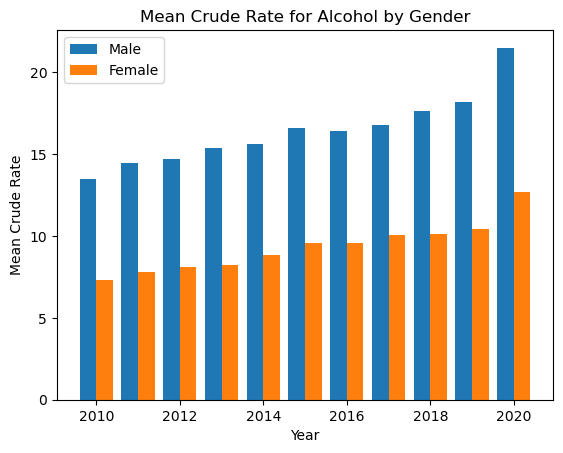

In [19]:

# Filter data for alcohol and male
dfalcgen1 = df[(df['Topic'] == 'Alcohol') & (df['Stratification'] == 'Male')]

# Calculate mean crude rate for males by year
mean_alc_male = dfalcgen1.loc[(dfalcgen1['Year'] >= 2010) & (dfalcgen1['Year'] <= 2020)] \
    .groupby('Year')['CrudeRate'].mean().reset_index(name='Mean_Crude_Rate')

print(mean_alc_male)

# Filter data for alcohol and female
dfalcgen2 = df[(df['Topic'] == 'Alcohol') & (df['Stratification'] == 'Female')]

# Calculate mean crude rate for females by year
mean_alc_female = dfalcgen2.loc[(dfalcgen2['Year'] >= 2010) & (dfalcgen2['Year'] <= 2020)] \
    .groupby('Year')['CrudeRate'].mean().reset_index(name='Mean_Crude_Rate')

print(mean_alc_female)

# Plotting as bar plot
plt.bar(mean_alc_male['Year'] - 0.2, mean_alc_male['Mean_Crude_Rate'], width=0.4, label='Male', align='center')
plt.bar(mean_alc_female['Year'] + 0.2, mean_alc_female['Mean_Crude_Rate'], width=0.4, label='Female', align='center')

plt.xlabel('Year')
plt.ylabel('Mean Crude Rate')
plt.title('Mean Crude Rate for Alcohol by Gender')
plt.legend()
plt.show()


Poisson regression analysis to find the association between Ethnicity and Mortality Crude Rate.

Developed a Poisson regression model using the formula, 
 ‘CrudeRate ~ Location + Stratification’.

In [11]:
dfalcethnicity = df[(df['Topic'] == 'Alcohol')  & (df['StratificationCategory']=='Race/Ethnicity')]

print(dfalcethnicity)


In [12]:
poisson_model = sm.GLM.from_formula(formula, data=dfalcethnicity, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              CrudeRate   No. Observations:                 1333
Model:                            GLM   Df Residuals:                     1279
Model Family:                 Poisson   Df Model:                           53
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3696.0
Date:                Thu, 14 Dec 2023   Deviance:                       1683.4
Time:                        14:29:14   Pearson chi2:                 1.76e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------


•	Based on the coefficients obtained from poisson regression analysis, the most significant locations are 'New Mexico', 'Wyoming', 'Alaska', and 'New York' . 
•	The coefficients obtained for the ethnic groups indicate the impact of each group compared to the ethnic group 'American Indian or Alaska Native'.


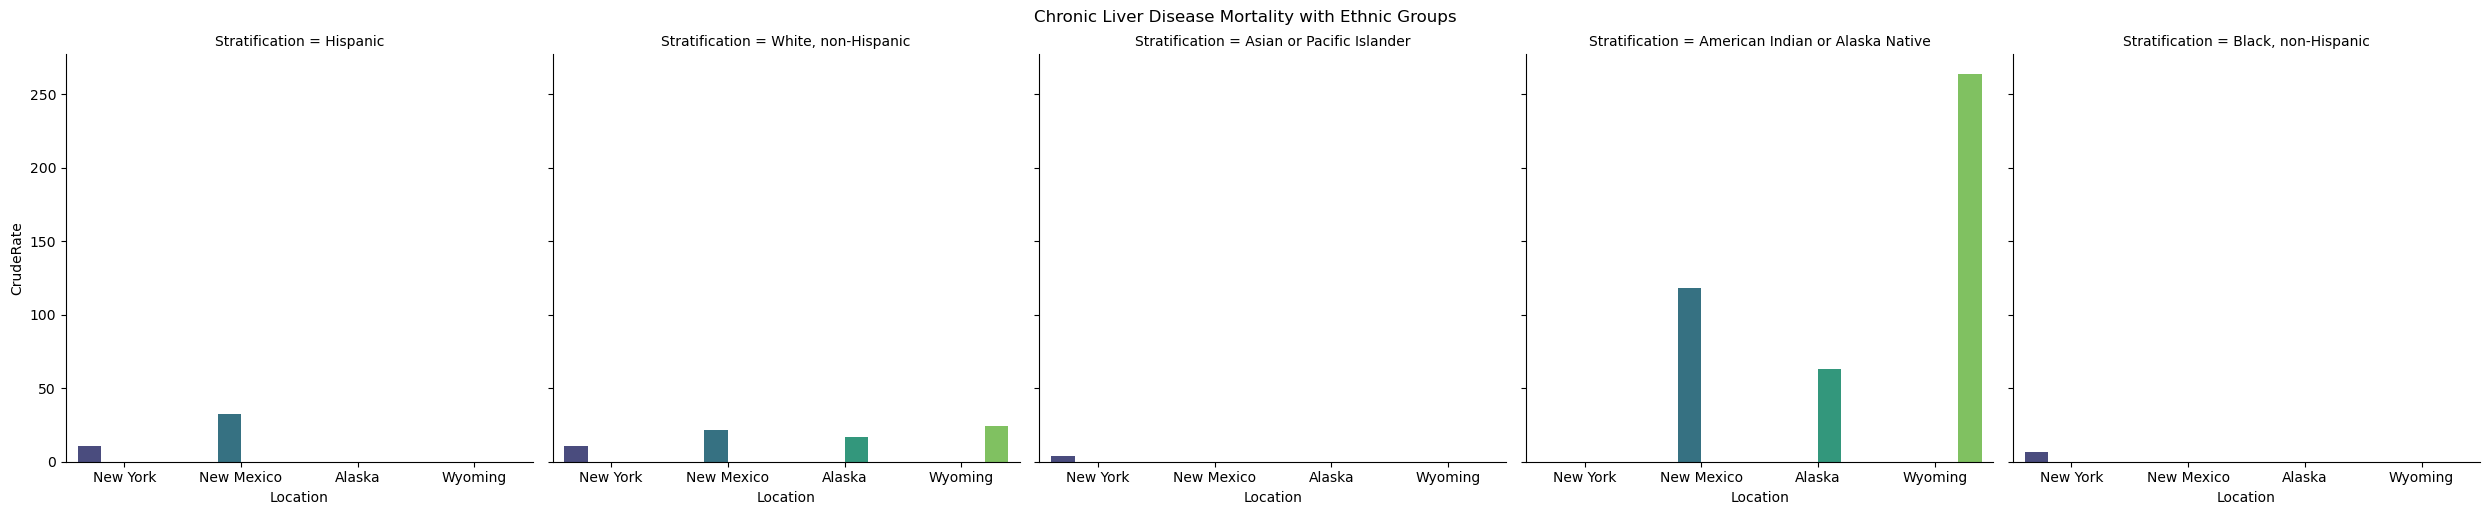

In [17]:
# Filter data for alcohol, Ethnicity, and specific locations
dfalcethni2020 = df[
    (df['Topic'] == 'Alcohol') &
    (df['StratificationCategory'] == 'Race/Ethnicity') &
    (df['Year'] == 2020) &
    (df['Location'].isin(['New Mexico', 'Wyoming', 'Alaska', 'New York']))
]

# Plotting
sns.catplot(data=dfalcethni2020, x='Location', y='CrudeRate', hue='Location', kind='bar', col='Stratification', palette='viridis')
plt.suptitle("Chronic Liver Disease Mortality with Ethnic Groups", y=1.02)
plt.show()

•	The predominant ethnic group with the highest mortality rate in these locations is 'American Indian or Alaska Native'.
•	It's worth noting that this particular ethnic group is not present in New York, which has the lowest mortality rate.


Heatmap analysis to find out the Locations with higher mortality rates and lower mortality rates.

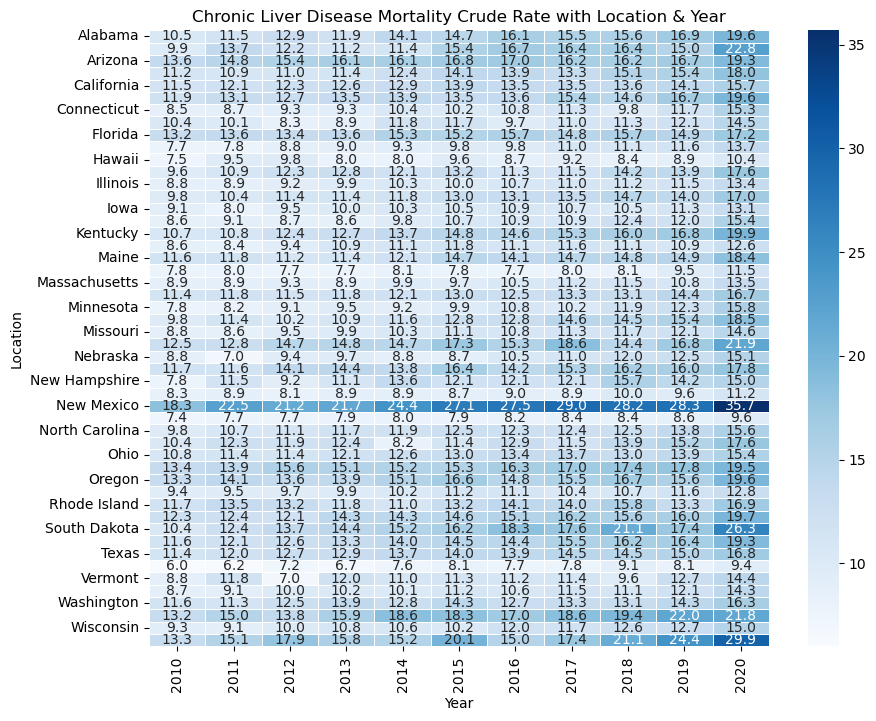

In [18]:
# Filter data for alcohol and overall
df_alc = df[
    (df['Topic'] == 'Alcohol') &
    (df['StratificationCategory'] == 'Overall')
]

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(
    data=df_alc.pivot_table(index='Location', columns='Year', values='CrudeRate', aggfunc='mean'),
    annot=True, fmt=".1f", cmap="Blues", linewidths=.5
)

plt.title("Chronic Liver Disease Mortality Crude Rate with Location & Year")
plt.xlabel("Year")
plt.ylabel("Location")
plt.xticks(rotation=90)
plt.show()

•	The number of cases increases with each passing year for each location.
•	In most locations, the crude rate was significantly higher in 2020 compared to 2010.
•	Some states consistently have higher rates than others, while some show fluctuations over the years.
•	When compared to other locations, 'New Mexico' consistently exhibits the highest crude rate, while 'Utah’ shows the lowest       crude rate for chronic liver disease mortality from 2010 to 2020.
